In [1]:
import pandas as pd

In [3]:
movies = pd.read_csv(r"C:\Users\saisu\Downloads\28th- Kaggle Workshop\28th- Kaggle Workshop\imbd dataset\movie.csv")
print(type(movies))
movies.head(10)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
tags = pd.read_csv(r"C:\Users\saisu\Downloads\28th- Kaggle Workshop\28th- Kaggle Workshop\imbd dataset\tag.csv")
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [10]:
ratings = pd.read_csv(r"C:\Users\saisu\Downloads\28th- Kaggle Workshop\28th- Kaggle Workshop\imbd dataset\rating.csv" , parse_dates = ['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [11]:
del ratings['timestamp']
del tags['timestamp']

In [12]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [13]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [14]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [20]:
row_0['userId']

18

In [21]:
'rating' in row_0

False

In [22]:
row_0.name

0

In [24]:
row_0 = row_0.rename('firstname')
row_0.name
                     

'firstname'

In [25]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [27]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [28]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [29]:
tags.iloc[[0,22,487]]

,userId,movieId,tag
0,18,4141,Mark Waters
22,65,7013,noir thriller
487,342,52328,madness


In [30]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [31]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [32]:
ratings['rating'].mean()

3.5255285642993797

In [33]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [34]:
ratings['rating'].min()

0.5

In [35]:
ratings['rating'].max()

5.0

In [36]:
ratings['rating'].std()

1.051988919275684

In [37]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [38]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [39]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [40]:
filter2 = ratings['rating'] > 0
print(filter2)
filter2.all()

0           True
1           True
2           True
3           True
4           True
            ... 
20000258    True
20000259    True
20000260    True
20000261    True
20000262    True
Name: rating, Length: 20000263, dtype: bool


True

In [41]:
movies.shape

(27278, 3)

In [42]:
movies.isnull().any().any()

False

In [43]:
ratings.shape

(20000263, 3)

In [44]:
ratings.isnull().any().any()

False

In [45]:
tags.shape

(465564, 3)

In [46]:
tags.isnull().any().any()

True

In [49]:
tags = tags.dropna()

In [50]:
tags.isnull().any().any()

False

In [51]:
tags.shape

(465548, 3)

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

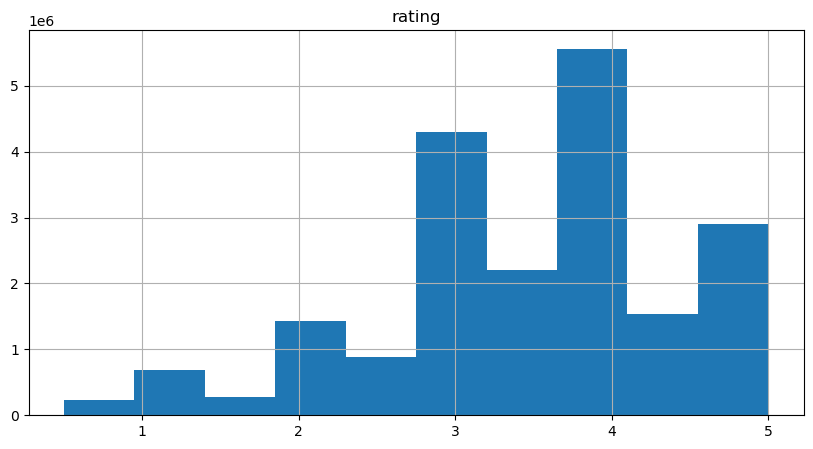

In [52]:
%matplotlib inline
ratings.hist(column = 'rating', figsize = (10,5))

<Axes: >

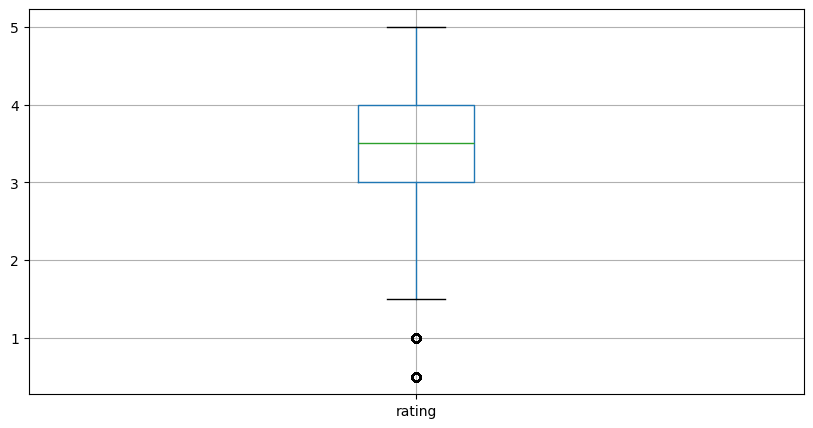

In [53]:
ratings.boxplot(column = 'rating', figsize = (10,5))

In [55]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [59]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [60]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [62]:
tag_counts = tags['tag'].value_counts(-10)
tag_counts[-10:]

tag
missing child                    0.000002
Ron Moore                        0.000002
Citizen Kane                     0.000002
mullet                           0.000002
biker gang                       0.000002
Paul Adelstein                   0.000002
the wig                          0.000002
killer fish                      0.000002
genetically modified monsters    0.000002
topless scene                    0.000002
Name: proportion, dtype: float64

<Axes: xlabel='tag'>

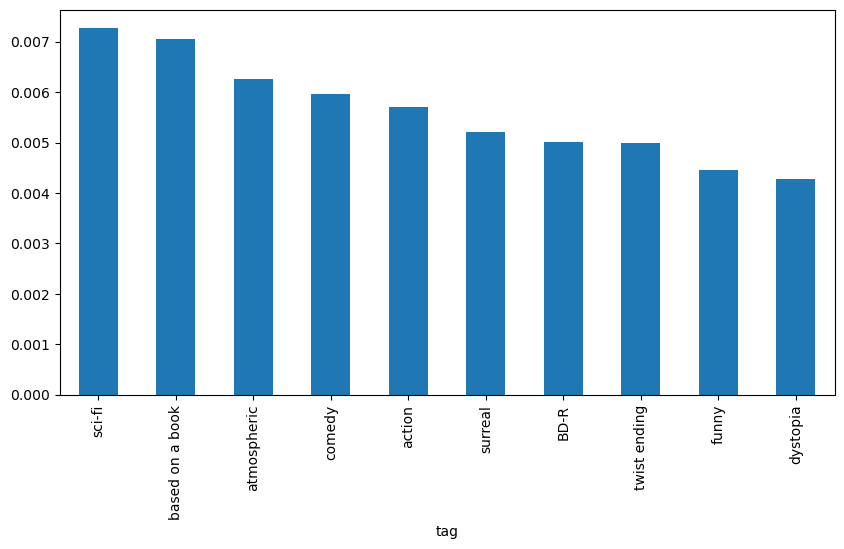

In [64]:
tag_counts[:10].plot(kind = 'bar', figsize=(10,5))

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex
